In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

1. 데이터값을 불러오고 데이터 값 안의 결측치를 isnull함수로 파악
- 데이터가 제대로 불러와졌는지를 확인해 보려면 train.head()를 실행시켜 보면 되는데, 위에서 불러온 train이라는 dataframe 중에서 앞의 5개의 열을 출력시킬 수 있다. 또한 정수 값을 parameter로 받아 그 만큼의 열을 보여준다.

In [ ]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv") 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


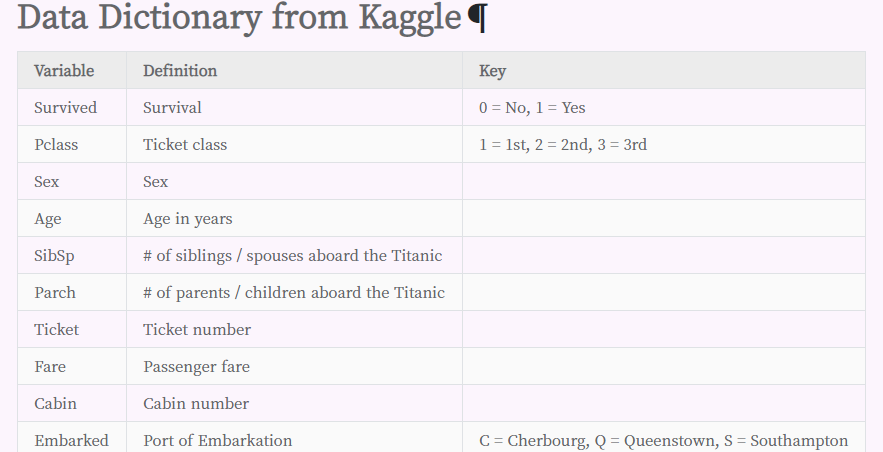

-Survivied는 생존 여부(0은 사망, 1은 생존; train 데이터에서만 제공)
-Pclass는 사회경제적 지위(1에 가까울 수록 높음)
-SipSp는 배우자나 형제 자매 명 수의 총 합
-Parch는 부모 자식 명 수의 총 합을 나타낸다.

In [ ]:
df_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Name 날리고, Cabin 0 or 1로 치환
-cabin은 객실을 의미하는데 객실의 여부가 생존 여부에 영향을 미친다고 판단

In [ ]:
df_train = df_train.drop("Name",axis=1)
df_test = df_test.drop("Name",axis=1)

In [ ]:
df_Cab_isnull1 = df_train["Cabin"].isnull()
df_Cab_isnull2 = df_test["Cabin"].isnull()

In [ ]:
for i in range(len(df_train["Cabin"])):
    if df_Cab_isnull1[i] == True:
        df_train["Cabin"][i] = 0
    else:
        df_train["Cabin"][i] = 1
        
for i in range(len(df_test["Cabin"])):
    if df_Cab_isnull2[i] == True:
        df_test["Cabin"][i] = 0
    else:
        df_test["Cabin"][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__'

## Sex 0 or 1 and Embarked Drop
### male to 0
### female to 1

In [ ]:
df_train = df_train.drop("Embarked",axis=1)
df_test = df_test.drop("Embarked",axis=1)
df_train = df_train.drop("Ticket",axis=1)
df_test = df_test.drop("Ticket",axis=1)

In [ ]:
for i in range(len(df_train["Sex"])):
    if df_train["Sex"][i] == "male":
        df_train["Sex"][i] = 0
    else:
        df_train["Sex"][i] = 1
for i in range(len(df_test["Sex"])):
    if df_test["Sex"][i] == "male":
        df_test["Sex"][i] = 0
    else:
        df_test["Sex"][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6

In [ ]:
y_train = df_train["Survived"]
X_train = df_train.drop("Survived",axis=1)

In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0
887,888,1,1,19.0,0,0,30.0000,1
888,889,3,1,NaN,1,2,23.4500,0
889,890,1,0,26.0,0,0,30.0000,1


In [ ]:
X_test = df_test
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,NaN,0,0,8.0500,0


In [ ]:
dfage = X_train["Age"]

In [ ]:
dfage = dfage.append(X_test["Age"])

In [ ]:
dfage.median()

28.0

In [ ]:
X_train["Age"] = X_train["Age"].fillna(28)
X_test["Age"] = X_test["Age"].fillna(28)

In [ ]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,28.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,28.0,0,0,8.0500,0


In [ ]:
dffare = X_train["Fare"]
dffare = dffare.append(X_test["Fare"])
dffare.median()

14.4542

In [ ]:
X_train["Fare"] = X_train["Fare"].fillna(14.4542)
X_test["Fare"] = X_test["Fare"].fillna(14.4542)

# Classification through SVM

1.   개념: 서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

2.   단어 설명: 마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.

http://hleecaster.com/ml-svm-concept/


In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
svm = SVC(kernel = 'linear',random_state=0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
count = 0
for i in y_pred:
    if i == 0:
        count +=1
        
print(count)

In [ ]:
data1 = pd.DataFrame(X_test["PassengerId"])
data2 = pd.DataFrame(y_pred)
data=pd.concat([data1,data2], axis=1)

In [ ]:
data

In [ ]:
data.to_excel(excel_writer='sample.xlsx')